In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter

In [27]:
count_vecs_long = pd.read_csv(filepath_or_buffer = '../data/200503countVecs.csv')


In [26]:
count_vecs_wide = count_vecs_long.pivot(index = 'volIssueTitleHash',
                                          columns = 'tokenIdx',
                                          values = 'tokenCount')\
                                    .fillna(0.0)
                

In [9]:
count_vecs_sing_vals = np.linalg.svd(a = count_vecs_wide,
                                     full_matrices = False,
                                     compute_uv = False)

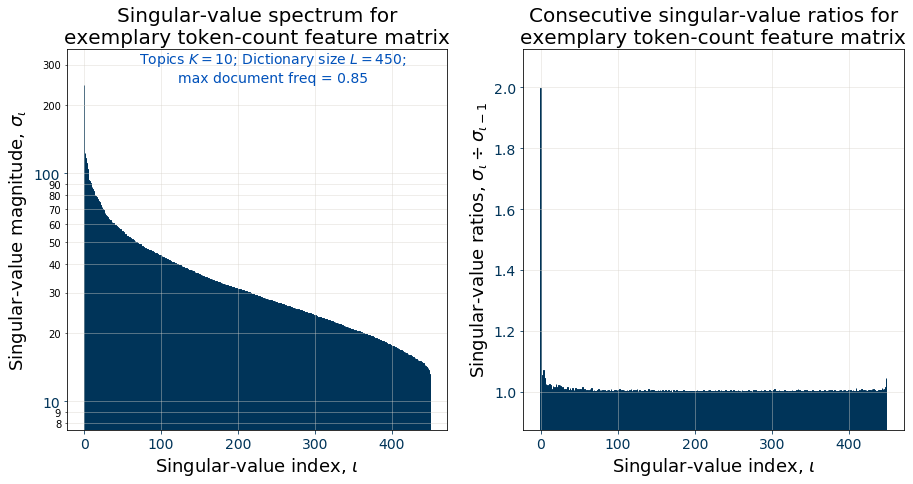

In [114]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2,
                         figsize = (15,7))
axes[0].bar(x = range(len(count_vecs_sing_vals)),
        height = count_vecs_sing_vals,
        color = '#0051ba',
        edgecolor = "#003459");
axes[0].set_yscale('log')
axes[0].grid(color = '#d7d2cb',
          which = 'both',
          alpha = 0.5)
axes[0].yaxis.set_major_formatter(ScalarFormatter())
axes[0].yaxis.set_minor_formatter(ScalarFormatter())
axes[0].set_ylim(bottom = 7.5,
               top = 350);
axes[0].tick_params(labelsize = 14,
                 color = '#003459',
                 labelcolor = '#003459')
axes[0].set_xlabel(xlabel = 'Singular-value index, $\iota$',
                fontsize = 18);
axes[0].set_ylabel(ylabel = 'Singular-value magnitude, $\sigma_\iota$',
                  fontsize = 18);
axes[0].set_title(label = 'Singular-value spectrum for\nexemplary token-count feature matrix',
                  fontsize = 20)
axes[0].text(x = 245,
             y = 245,
              s = 'Topics $K=10$; Dictionary size $L=450$;\nmax document freq = 0.85',
               fontsize = 14,
            ha = 'center',
            va = 'bottom',
            color = '#0051ba');
axes[1].bar(x = range(len(count_vecs_sing_vals)-1),
            height = count_vecs_sing_vals[:-1]/count_vecs_sing_vals[1:],
            color = '#0051ba',
            edgecolor = "#003459");
axes[1].grid(color = '#d7d2cb',
          which = 'both',
          alpha = 0.5)
axes[1].tick_params(labelsize = 14,
                     color = '#003459',
                     labelcolor = '#003459')
axes[1].set_xlabel(xlabel = 'Singular-value index, $\iota$',
                fontsize = 18);
axes[1].set_ylabel(ylabel = 'Singular-value ratios, $\sigma_\iota \div \sigma_{\iota-1}$',
                  fontsize = 18);
axes[1].set_ylim(bottom = 0.875,
                 top = 2.125);
axes[1].set_title(label = 'Consecutive singular-value ratios for\nexemplary token-count feature matrix',
                  fontsize = 20)
plt.savefig(os.path.join('../graphics', 'count-vector singular-value spectrum.png'),
            dpi = 150,
            transparent = True,
            bbox_inches = 'tight')

In [91]:
count_vecs_sing_vals

array([245.10371461, 122.76361068, 116.82845916, 110.70925551,
       104.81924009,  97.68766458,  93.52209686,  92.44992549,
        90.26100941,  88.85294606,  86.8711847 ,  85.6587382 ,
        83.53150847,  82.06229496,  80.22517562,  79.66121775,
        78.85099049,  77.35679175,  76.73868587,  75.44678547,
        74.62959931,  72.78336955,  72.45162899,  71.42961612,
        69.77258089,  69.39202169,  67.99118685,  66.80074776,
        65.91718386,  64.80820252,  64.07458053,  63.66761046,
        63.06849985,  62.59801172,  62.32815905,  61.93900665,
        61.08277763,  60.74721724,  60.46038767,  59.78851847,
        59.62514776,  59.26258437,  58.60062799,  58.11668982,
        57.81949029,  57.61588943,  57.00442881,  56.73636023,
        56.50590786,  56.08536474,  56.07255035,  55.51764098,
        54.9856908 ,  54.41742451,  54.13981279,  53.36435493,
        53.15622581,  53.03866086,  52.59933689,  52.31873267,
        52.1264771 ,  51.75139622,  51.51931474,  51.43

In [116]:
max(count_vecs_sing_vals)/min(count_vecs_sing_vals)

18.61966453950248

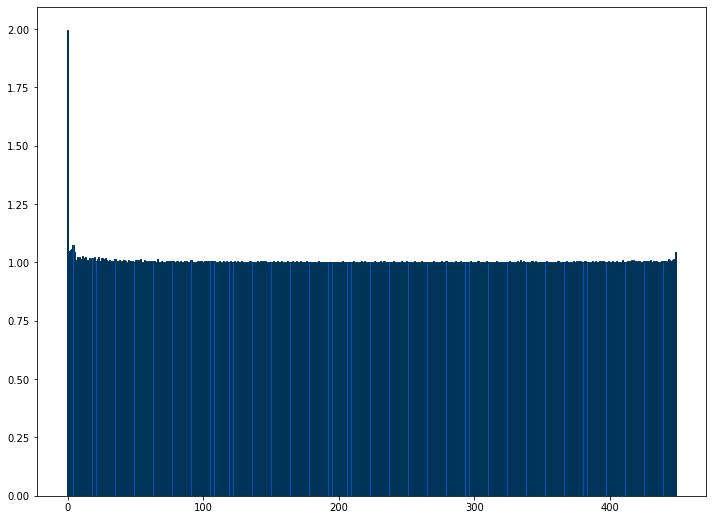

In [81]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize = (12,9))
axes.bar(x = range(len(count_vecs_sing_vals)-1),
        height = count_vecs_sing_vals[:-1]/count_vecs_sing_vals[1:],
        color = '#0051ba',
        edgecolor = "#003459");



In [121]:
sum(np.cumsum(np.square(count_vecs_sing_vals))/np.sum(np.square(count_vecs_sing_vals)) <= 0.95)

338